In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = "resources/cleaned_1976-2020-president.csv"
data = pd.read_csv(file_path)

# Preview the data to understand its structure
data.head()



,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_share
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,0.0,DEMOCRAT,0.807793
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,0.0,REPUBLICAN,0.617723
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,0.0,OTHER,0.011272
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,0.0,OTHER,0.008173
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,0.0,OTHER,0.002395


In [3]:
# Filter out Democrat and Republican parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Display unique parties to understand which third parties had significant turnout
print(non_major_parties['party_detailed'].unique())

# Show a summary of vote counts for non-major parties
non_major_parties_summary = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().sort_values(ascending=False)
print(non_major_parties_summary)


['AMERICAN INDEPENDENT PARTY' 'PROHIBITION' 'COMMUNIST PARTY USE'
 'LIBERTARIAN' '0' 'INDEPENDENT' 'SOCIALIST WORKERS' 'AMERICAN'
 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION' 'SOCIALIST LABOR'
 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.' 'CONSERVATIVE' 'HUMAN RIGHTS'
 "MCCARTHY '76" "PEOPLE'S" 'INTERNATIONAL DEVELOPMENT BANK'
 'INDUSTRIAL GOVERNMENT PARTY' 'SOCIALIST' 'LIBERAL PARTY'
 'FREE LIBERTARIAN' 'LABOR' 'CONSTITUTION PARTY' 'CONCERNED CITIZENS'
 'STATESMAN' 'CITIZENS' 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN'
 'ANDERSON COALITION' 'NOMINATED BY PETITION' 'RESPECT FOR LIFE'
 'RIGHT-TO-LIFE' 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS'
 "NATURAL PEOPLE'S LEAGUE" 'POPULIST' 'ALLIANCE'
 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE' 'BIG DEAL PARTY'
 'NATIONAL UNITY' 'NEW ALLIANCE' 'NATIONAL ECONOMIC RECOVERY'
 'THIRD WORLD ASSEMBLY' 'SOLIDARITY' 'PATRIOTIC PARTY' 'OTHER'
 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER' 'WRITE-IN' 'UNITED CITIZENS'
 'LIBERTY UNION PARTY' 'AMERICA FIR

Unique party names after removal:
['DEMOCRAT' 'REPUBLICAN' 'AMERICAN INDEPENDENT PARTY' 'PROHIBITION'
 'COMMUNIST PARTY USE' 'LIBERTARIAN' 'INDEPENDENT' 'SOCIALIST WORKERS'
 'AMERICAN' 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION'
 'SOCIALIST LABOR' 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.'
 'CONSERVATIVE' 'HUMAN RIGHTS' "MCCARTHY '76" "PEOPLE'S"
 'INTERNATIONAL DEVELOPMENT BANK' 'INDUSTRIAL GOVERNMENT PARTY'
 'SOCIALIST' 'LIBERAL PARTY' 'FREE LIBERTARIAN' 'LABOR'
 'CONSTITUTION PARTY' 'CONCERNED CITIZENS' 'STATESMAN' 'CITIZENS'
 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN' 'ANDERSON COALITION'
 'NOMINATED BY PETITION' 'RESPECT FOR LIFE' 'RIGHT-TO-LIFE'
 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS' "NATURAL PEOPLE'S LEAGUE"
 'POPULIST' 'ALLIANCE' 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE'
 'BIG DEAL PARTY' 'NATIONAL UNITY' 'NEW ALLIANCE'
 'NATIONAL ECONOMIC RECOVERY' 'THIRD WORLD ASSEMBLY' 'SOLIDARITY'
 'PATRIOTIC PARTY' 'OTHER' 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER'
 'WRITE-IN

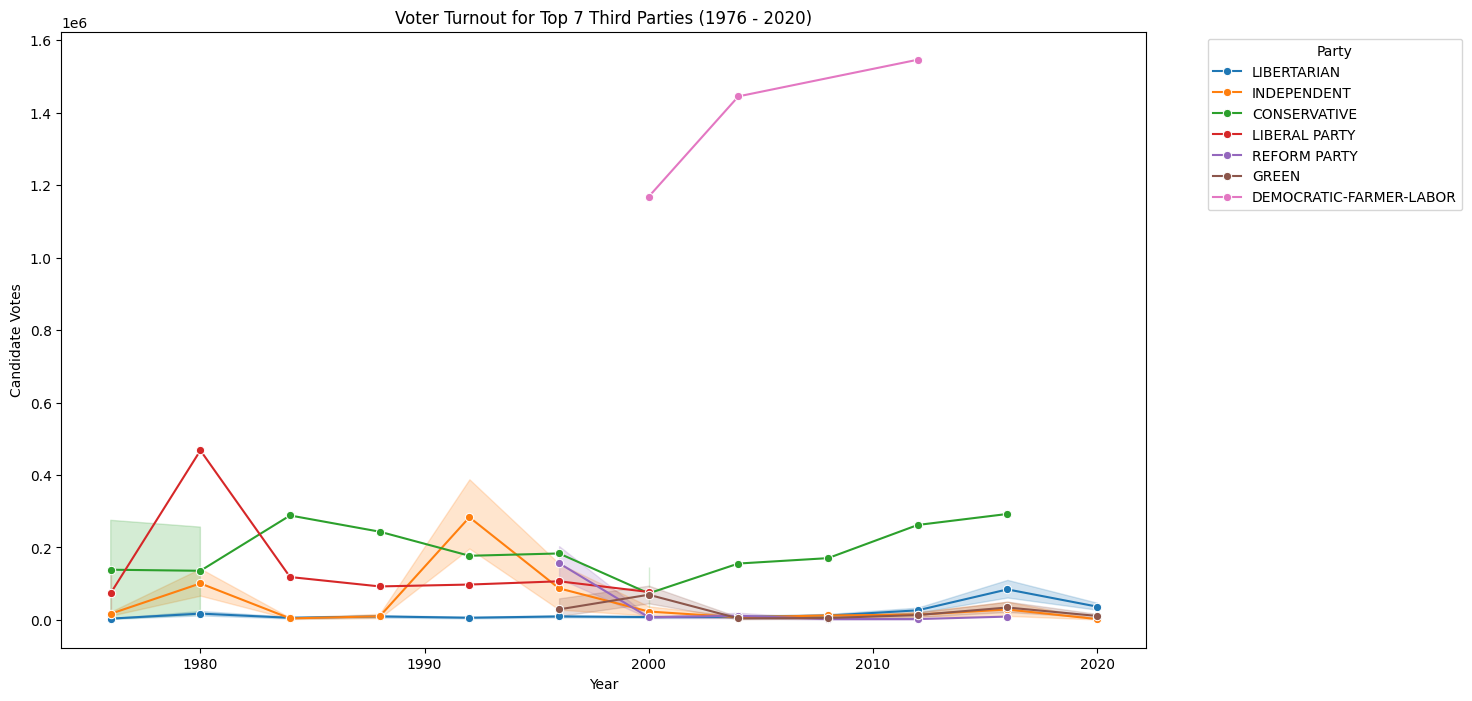

In [4]:
# Remove rows where party_detailed is "0"
data = data[data['party_detailed'] != '0']

# Verify that "0" has been removed from the party names
print("Unique party names after removal:")
print(data['party_detailed'].unique())
# Filter out Democrat and Republican parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Identify the top 7 third parties based on total votes received
top_7_third_parties = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().nlargest(7).index

# Filter the dataset to only include the top 7 third parties
top_7_data = non_major_parties[non_major_parties['party_detailed'].isin(top_7_third_parties)]

# Plot voter turnout over time for the top 7 third parties
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_7_data, x="year", y="candidatevotes", hue="party_detailed", marker="o")
plt.title("Voter Turnout for Top 7 Third Parties (1976 - 2020)")
plt.xlabel("Year")
plt.ylabel("Candidate Votes")
plt.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Unique party names after removal:
['DEMOCRAT' 'REPUBLICAN' 'AMERICAN INDEPENDENT PARTY' 'PROHIBITION'
 'COMMUNIST PARTY USE' 'LIBERTARIAN' 'INDEPENDENT' 'SOCIALIST WORKERS'
 'AMERICAN' 'PEACE & FREEDOM' 'U.S. LABOR' 'NO PARTY AFFILIATION'
 'SOCIALIST LABOR' 'AMERICAN PARTY OF IOWA' 'SOCIALIST U.S.A.'
 'HUMAN RIGHTS' "MCCARTHY '76" "PEOPLE'S" 'INTERNATIONAL DEVELOPMENT BANK'
 'INDUSTRIAL GOVERNMENT PARTY' 'SOCIALIST' 'LIBERAL PARTY'
 'FREE LIBERTARIAN' 'LABOR' 'CONSTITUTION PARTY' 'CONCERNED CITIZENS'
 'STATESMAN' 'CITIZENS' 'WORKERS WORLD' 'NATIONAL UNITY CAMPAIGN'
 'ANDERSON COALITION' 'NOMINATED BY PETITION' 'RESPECT FOR LIFE'
 'RIGHT-TO-LIFE' 'MIDDLE CLASS CANDIDATE' 'DOWN WITH LAWYERS'
 "NATURAL PEOPLE'S LEAGUE" 'POPULIST' 'ALLIANCE'
 'UNITED SOVEREIGN CITIZENS' 'WORKERS LEAGUE' 'BIG DEAL PARTY'
 'NATIONAL UNITY' 'NEW ALLIANCE' 'NATIONAL ECONOMIC RECOVERY'
 'THIRD WORLD ASSEMBLY' 'SOLIDARITY' 'PATRIOTIC PARTY' 'OTHER'
 'PROGRESSIVE' 'GRASSROOTS' 'CONSUMER' 'WRITE-IN' 'UNITED CITIZE

C:\Users\ntrie\AppData\Local\Temp\ipykernel_35996\2294050407.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_third_parties.index, y=top_4_third_parties.values, palette="viridis")


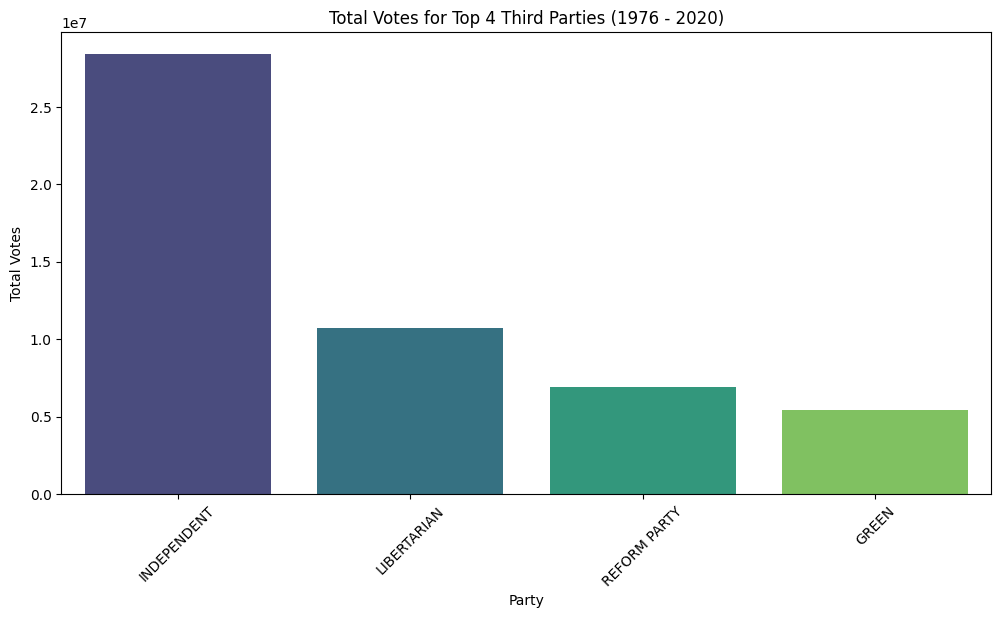

In [13]:
# Load the cleaned dataset
file_path = "resources/cleaned_1976-2020-president.csv"
data = pd.read_csv(file_path)

# Remove rows where party_detailed is "0", "democratic-farmer-labor", "conservative", or "liberal party"
excluded_parties = ["0", "DEMOCRATIC-FARMER-LABOR", "CONSERVATIVE", "LIBERAL"]
data = data[~data['party_detailed'].isin(excluded_parties)]

# Verify that specified parties have been removed
print("Unique party names after removal:")
print(data['party_detailed'].unique())

# Filter out Democrat and Republican parties to focus on third parties
non_major_parties = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Identify the top 4 third parties based on total votes received
top_4_third_parties = non_major_parties.groupby('party_detailed')['candidatevotes'].sum().nlargest(4)

# Plot total votes for the top 4 third parties as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_4_third_parties.index, y=top_4_third_parties.values, palette="viridis")
plt.title("Total Votes for Top 4 Third Parties (1976 - 2020)")
plt.xlabel("Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()

In [14]:

# Define election years and parties to exclude
election_years = list(range(1976, 2024, 4))
excluded_parties = ["DEMOCRAT", "REPUBLICAN", "DEMOCRATIC-FARMER-LABOR", "CONSERVATIVE", "LIBERAL", "0"]

# Filter for only election years and exclude specified parties
third_party_data = data[(data['year'].isin(election_years)) & (~data['party_detailed'].isin(excluded_parties))]

# Identify the top third-party candidates for each election year
top_third_parties_by_year = third_party_data.groupby('year').apply(
    lambda x: x.nlargest(3, 'candidatevotes')
).reset_index(drop=True)

# Display the results
print("Top Third-Party Candidates by Election Year (1976 - 2020):")
print(top_third_parties_by_year[['year', 'candidate', 'party_detailed', 'candidatevotes']])

Top Third-Party Candidates by Election Year (1976 - 2020):
    year                  candidate    party_detailed  candidatevotes
0   1976              CARTER, JIMMY     LIBERAL PARTY          145393
1   1976  MCCARTHY, EUGENE ""GENE""       INDEPENDENT           65637
2   1976  MCCARTHY, EUGENE ""GENE""       INDEPENDENT           58267
3   1980          ANDERSON, JOHN B.       INDEPENDENT          739618
4   1980          ANDERSON, JOHN B.     LIBERAL PARTY          467801
5   1980          ANDERSON, JOHN B.       INDEPENDENT          382539
6   1984            MONDALE, WALTER     LIBERAL PARTY          118324
7   1984            BERGLAND, DAVID       LIBERTARIAN           49951
8   1984              RICHARDS, BOB          POPULIST           39265
9   1988           DUKAKIS, MICHAEL     LIBERAL PARTY           92395
10  1988       PAUL, RONALD ""RON""       LIBERTARIAN           70105
11  1988             FULANI, LENORA       INDEPENDENT           58999
12  1992                PEROT, 

In [6]:
# Filter out Democrat and Republican candidates
third_party_candidates = data[(data['party_detailed'] != 'DEMOCRAT') & (data['party_detailed'] != 'REPUBLICAN')]

# Find the top third-party candidates based on the total votes received
top_third_party_candidates = third_party_candidates.groupby(['candidate', 'party_detailed'])['candidatevotes'].sum().nlargest(10)

# Display the top third-party candidates with the most votes
print("Top 3rd Party Candidates by Total Votes (1976 - 2020):")
print(top_third_party_candidates)

Top 3rd Party Candidates by Total Votes (1976 - 2020):
candidate          party_detailed         
PEROT, ROSS        INDEPENDENT                20126507
                   REFORM PARTY                6568145
JOHNSON, GARY      LIBERTARIAN                 5341570
ANDERSON, JOHN B.  INDEPENDENT                 4833348
NADER, RALPH       GREEN                       3023585
JORGENSEN, JO      LIBERTARIAN                 1797355
STEIN, JILL        GREEN                       1763293
OBAMA, BARACK H.   DEMOCRATIC-FARMER-LABOR     1546167
KERRY, JOHN        DEMOCRATIC-FARMER-LABOR     1445014
0                  INDEPENDENT                 1373801
Name: candidatevotes, dtype: int64


In [11]:
# Filter out Democrat, Republican, Democratic-Farmer-Labor, Conservative, and Liberal parties
third_party_data = data[
    (data['party_detailed'] != 'DEMOCRAT') & 
    (data['party_detailed'] != 'REPUBLICAN') & 
    (data['party_detailed'] != 'DEMOCRATIC-FARMER-LABOR') & 
    (data['party_detailed'] != 'CONSERVATIVE') & 
    (data['party_detailed'] != 'LIBERAL')
]

# Replace "Blank Vote/Scattering" in 2004 with Ralph Nader for the Independent candidate
third_party_data.loc[
    (third_party_data['year'] == 2004) & (third_party_data['candidate'] == 'Blank Vote/Scattering'),
    ['candidate', 'party_detailed']
] = ['Nader, Ralph', 'INDEPENDENT']

# Verify the correction
print("Corrected entries for 2004:")
print(third_party_data[(third_party_data['year'] == 2004) & (third_party_data['candidate'] == 'Nader, Ralph')])
# Calculate total votes by year to get the base for percentage calculation
total_votes_per_year = data.groupby('year')['candidatevotes'].sum()

# Add a new column for the percentage of total votes each third-party received by year
third_party_data = third_party_data.copy()  # To avoid SettingWithCopyWarning
third_party_data['vote_percentage'] = third_party_data.apply(
    lambda row: (row['candidatevotes'] / total_votes_per_year[row['year']]) * 100, axis=1
)

# Group by year, party, and candidate to get the total vote percentage per candidate
third_party_vote_percentage = third_party_data.groupby(['year', 'party_detailed', 'candidate'])['vote_percentage'].sum().reset_index()

# Sort by vote percentage to find the top entries
top_third_party_years = third_party_vote_percentage.sort_values(by='vote_percentage', ascending=False).head(10)

# Display the top results
print("Top Years with Highest Third-Party Vote Percentage (Excluding Specific Major and Minor Parties):")
print(top_third_party_years)



Corrected entries for 2004:
Empty DataFrame
Columns: [year, state, state_po, state_fips, state_cen, state_ic, office, candidate, party_detailed, writein, candidatevotes, totalvotes, version, notes, party_simplified, vote_share]
Index: []
Top Years with Highest Third-Party Vote Percentage (Excluding Specific Major and Minor Parties):
     year party_detailed             candidate  vote_percentage
137  1992    INDEPENDENT           PEROT, ROSS        18.854764
202  1996   REFORM PARTY           PEROT, ROSS         6.814148
49   1980    INDEPENDENT     ANDERSON, JOHN B.         5.587889
438  2016    LIBERTARIAN         JOHNSON, GARY         3.015758
226  2000          GREEN          NADER, RALPH         2.368989
580  2020    LIBERTARIAN         JORGENSEN, JO         1.133774
52   1980    LIBERTARIAN  CLARK, EDWARD ""ED""         1.002812
426  2016          GREEN           STEIN, JILL         0.994884
385  2012    LIBERTARIAN         JOHNSON, GARY         0.941924
185  1996    INDEPENDENT 

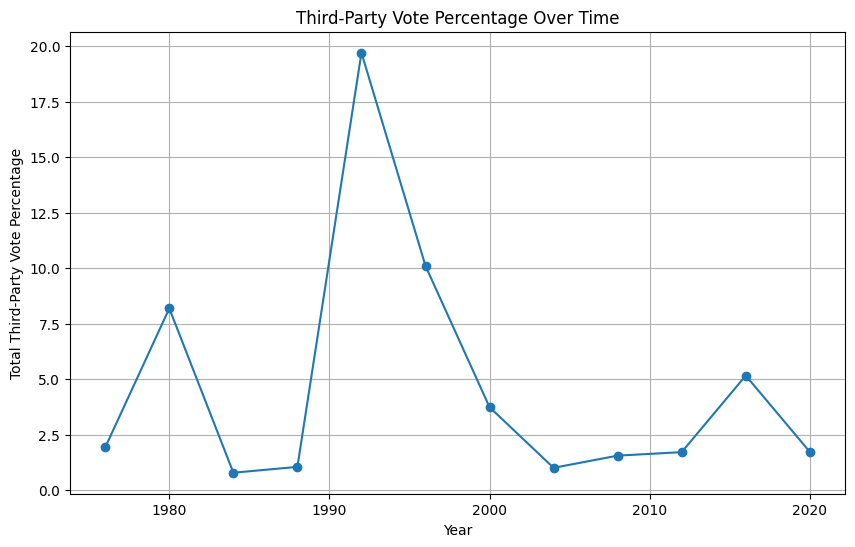

In [8]:
# Calculate total third-party vote percentage by year
third_party_yearly_percentage = third_party_data.groupby('year')['vote_percentage'].sum().reset_index()

# Plot third-party vote percentage over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(third_party_yearly_percentage['year'], third_party_yearly_percentage['vote_percentage'], marker='o')
plt.title("Third-Party Vote Percentage Over Time")
plt.xlabel("Year")
plt.ylabel("Total Third-Party Vote Percentage")
plt.grid(True)
plt.show()

In [9]:
# Find the third-party candidate with the highest vote percentage in each year
top_third_party_by_year = third_party_data.loc[third_party_data.groupby('year')['vote_percentage'].idxmax()]
top_third_party_by_year = top_third_party_by_year[['year', 'candidate', 'party_detailed', 'vote_percentage']]

print("Most Successful Third-Party Candidates by Year:")
print(top_third_party_by_year)


Most Successful Third-Party Candidates by Year:
      year          candidate    party_detailed  vote_percentage
206   1976      CARTER, JIMMY     LIBERAL PARTY         0.178605
364   1980  ANDERSON, JOHN B.       INDEPENDENT         0.855212
897   1984    MONDALE, WALTER     LIBERAL PARTY         0.127724
1198  1988   DUKAKIS, MICHAEL     LIBERAL PARTY         0.100899
1334  1992        PEROT, ROSS       INDEPENDENT         2.198853
1709  1996        PEROT, ROSS      REFORM PARTY         0.725332
2071  2000       NADER, RALPH             GREEN         0.397899
2618  2004        KERRY, JOHN  WORKING FAMILIES         0.109302
2956  2008       MCCAIN, JOHN      INDEPENDENCE         0.125004
3285  2012   OBAMA, BARACK H.  WORKING FAMILIES         0.114538
3427  2016      JOHNSON, GARY       LIBERTARIAN         0.352677
3775  2020      JORGENSEN, JO       LIBERTARIAN         0.118749


Top Third-Party Candidates by Year (After Exclusions):
      year              candidate   party_detailed  vote_percentage
206   1976          CARTER, JIMMY    LIBERAL PARTY         0.178175
364   1980      ANDERSON, JOHN B.      INDEPENDENT         0.855081
897   1984        MONDALE, WALTER    LIBERAL PARTY         0.127704
1198  1988       DUKAKIS, MICHAEL    LIBERAL PARTY         0.100882
1334  1992            PEROT, ROSS      INDEPENDENT         2.195039
1709  1996            PEROT, ROSS     REFORM PARTY         0.723984
2071  2000           NADER, RALPH            GREEN         0.396525
2620  2004  BLANK VOTE/SCATTERING                0         0.046776
2753  2008           NADER, RALPH  PEACE & FREEDOM         0.082470
3100  2012          JOHNSON, GARY      LIBERTARIAN         0.110904
3427  2016          JOHNSON, GARY      LIBERTARIAN         0.349813
3775  2020          JORGENSEN, JO      LIBERTARIAN         0.118524


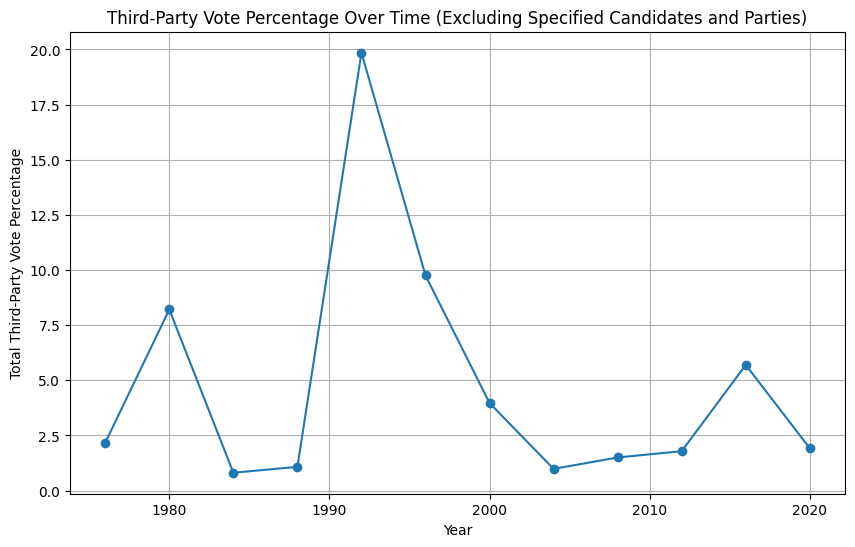

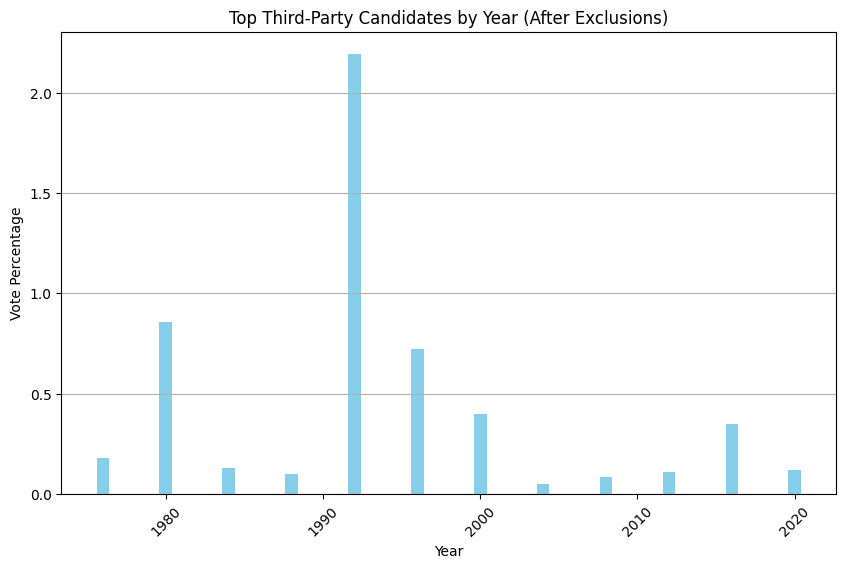

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "resources/cleaned_1976-2020-president.csv"
data = pd.read_csv(file_path)

# Step 1: Filter out major parties and specific minor parties
# Exclude Democrat, Republican, Democratic-Farmer-Labor, Conservative, Liberal, Working Families, and Independence parties
excluded_parties = ['DEMOCRAT', 'REPUBLICAN', 'DEMOCRATIC-FARMER-LABOR', 'CONSERVATIVE', 'LIBERAL', 'WORKING FAMILIES', 'INDEPENDENCE']
third_party_data = data[~data['party_detailed'].isin(excluded_parties)]

# Step 2: Remove specific candidates from the third-party dataset
excluded_candidates = ["Carter, Jimmy", "Mondale, Walter", "Dukakis, Michael", "Kerry, John", "McCain, John", "Obama, Barack H."]
third_party_data = third_party_data[~third_party_data['candidate'].isin(excluded_candidates)]

# Step 3: Calculate the vote percentage for each remaining third-party candidate
total_votes_per_year = data.groupby('year')['candidatevotes'].sum()
third_party_data = third_party_data.copy()  # Avoid SettingWithCopyWarning
third_party_data['vote_percentage'] = third_party_data.apply(
    lambda row: (row['candidatevotes'] / total_votes_per_year[row['year']]) * 100, axis=1
)

# Step 4: Identify the top third-party candidate per year after exclusions
top_third_party_by_year = third_party_data.loc[third_party_data.groupby('year')['vote_percentage'].idxmax()]
top_third_party_by_year = top_third_party_by_year[['year', 'candidate', 'party_detailed', 'vote_percentage']]

print("Top Third-Party Candidates by Year (After Exclusions):")
print(top_third_party_by_year)

# Visualization 1: Total Third-Party Vote Percentage by Year (Trend Over Time)
third_party_yearly_percentage = third_party_data.groupby('year')['vote_percentage'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(third_party_yearly_percentage['year'], third_party_yearly_percentage['vote_percentage'], marker='o')
plt.title("Third-Party Vote Percentage Over Time (Excluding Specified Candidates and Parties)")
plt.xlabel("Year")
plt.ylabel("Total Third-Party Vote Percentage")
plt.grid(True)
plt.show()

# Visualization 2: Top Third-Party Candidates by Vote Percentage
plt.figure(figsize=(10, 6))
plt.bar(top_third_party_by_year['year'], top_third_party_by_year['vote_percentage'], color='skyblue')
plt.title("Top Third-Party Candidates by Year (After Exclusions)")
plt.xlabel("Year")
plt.ylabel("Vote Percentage")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
